# 2nd Midterm (2024) - Assignment 3 - Alice Nicoletta

"Implement from scratch an RBM and apply it to DSET3. The RBM should be implemented fully by you (both CD-1 training and inference steps) but you are free to use library functions for the rest (e.g. image loading and management, etc.).

1)Train an RBM with a number of hidden neurons selected by you (single layer) on the MNIST data (use the training set split provided by the website).

2)Use the trained RBM to encode a selection of test images (e.g. using one per digit type) using the corresponding activation of the hidden neurons.

3)Train a simple classifier (e.g. any simple classifier in scikit) to recognize the MNIST digits using as inputs their encoding obtained at step 2. Use the standard training/test split. Show a performance metric of your choice in the presentation/handout."

# 1) Creation and training of an RBM

The code for the RBM is in RBM.py file, where rbm is defined as a class.

In [1]:
from RBM import rbm
import matplotlib.pyplot as plt
import numpy as np

Let's read and define our datasets.

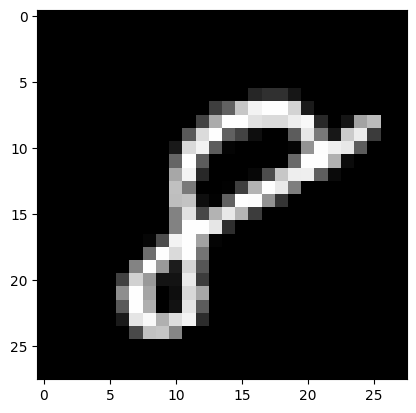

In [219]:
import struct

with open('datasets/train-images-idx3-ubyte/train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

plt.imshow(data[-1,:,:], cmap='gray')
plt.show()

In [33]:
data.shape

(60000, 28, 28)

In [31]:
with open('datasets/train-labels-idx1-ubyte/train-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_train = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    y_train = y_train.reshape((size,)) # (Optional)
print(y_train)

[5 0 4 ... 5 6 8]


We normalize the dataset to be into [0,1] and then we binarize it by a threshold.

In [223]:
data=data/255
A=data>0.5
X_train=np.zeros([60000,784])
for i in range(60000):
    X_train[i,:]=A[i,:,:].flatten()

We train a RBM with $28^2$ visible units and 128 hidden units, for only 5 epochs. 

In [250]:
Restr_BM=rbm(28**2,128)
training_history=Restr_BM.fit(data=X_train, lr=0.1, epochs=5)

error= 0.07961298894557824 at epoch= 0 

error= 0.07556651785714286 at epoch= 1 

error= 0.07452731717687076 at epoch= 2 

error= 0.07341896258503403 at epoch= 3 

error= 0.07232353316326531 at epoch= 4 



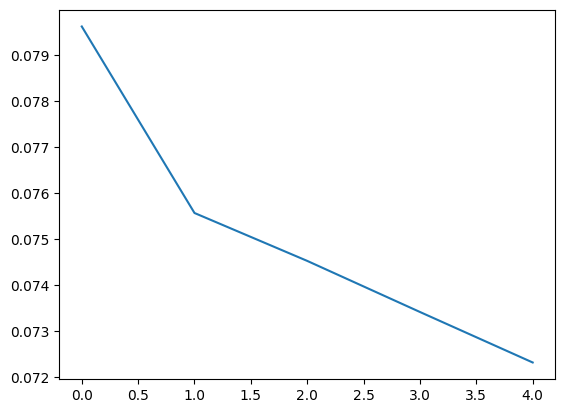

In [251]:
plt.plot(training_history)
plt.show()

In [258]:
Weights=Restr_BM.W.copy()

In [259]:
Weights=np.reshape(Weights, (28,28,128))

Let's plot the weights between each hidden unit and all the visible units, i.e. the rows of the RBM weight matrix.

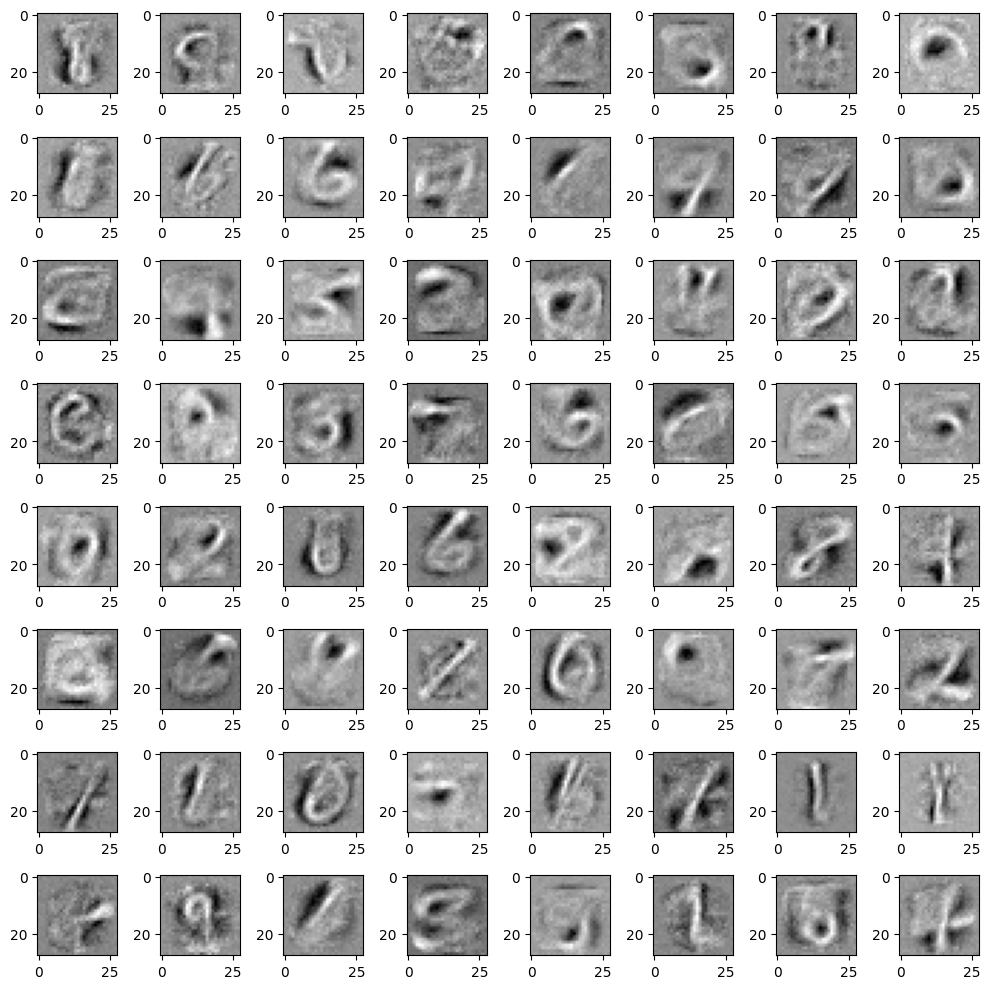

In [262]:
fig, axes = plt.subplots(8,8, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(Weights[:,:,i], cmap='gray')
fig.tight_layout()

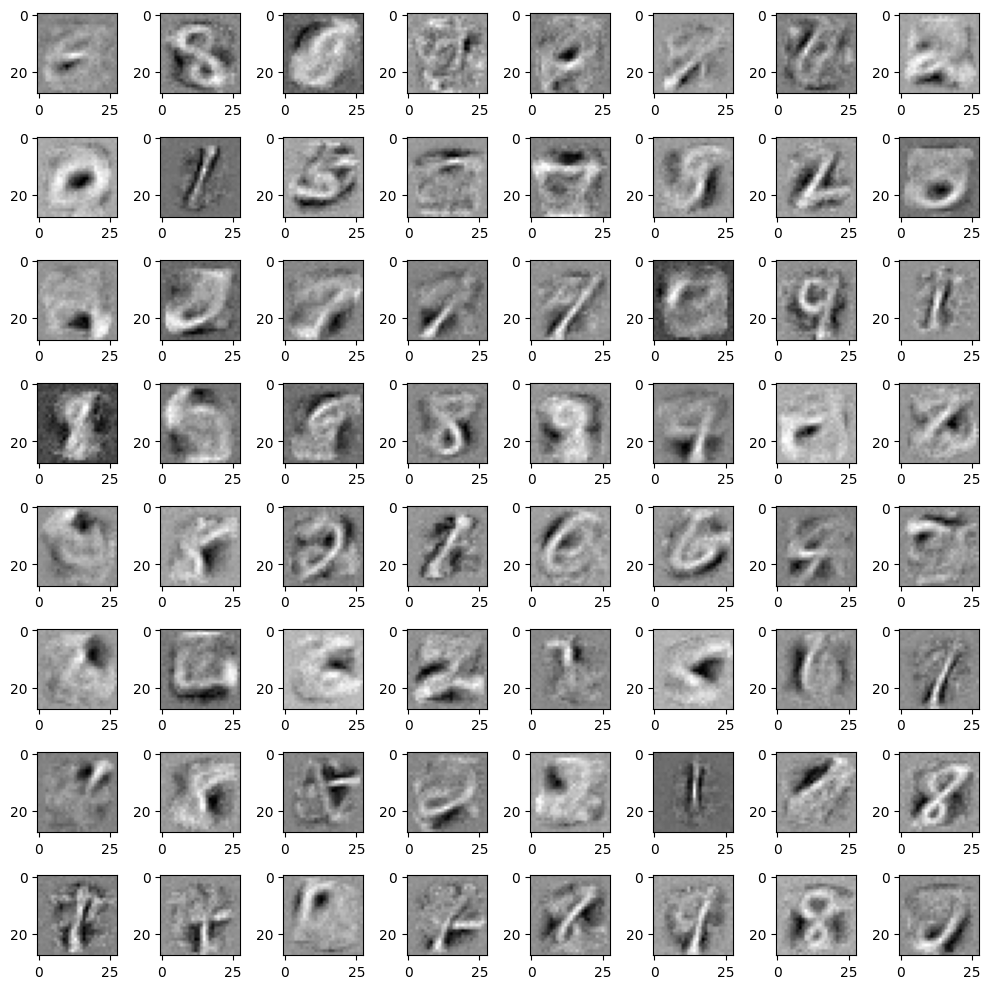

In [263]:
fig, axes = plt.subplots(8,8, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(Weights[:,:,i+64], cmap='gray')
fig.tight_layout()

We can notice that most of them resemble digits. This shows that the model is concretely learning the shape of our data.  

# 2) Encoding and Reconstruction

Let's plot some original vs reconstructed digits, taken from the test set, so that our trained model has never seen them before.

In [385]:
import struct

with open('datasets/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

Let's sample an index for each digit from the test set.

In [323]:
a=[] 
for i in range(10):
    a.append(np.where(y_test==i)[0][0])


In [327]:
a

[3, 2, 1, 18, 4, 8, 11, 0, 61, 7]

In [337]:
y_test[a]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [386]:
data=data/255


<function ndarray.sum>

In [394]:
data2=data
Reconstr=np.zeros([10,28,28])
j=0
for i in a:
    Restr_BM.encoding(data2[i,:,:].flatten(), sampling=True)
    tmp=Restr_BM.reconstruction(sampling=False)
    Reconstr[j,:,:]=tmp.reshape(28,28)
    j=j+1

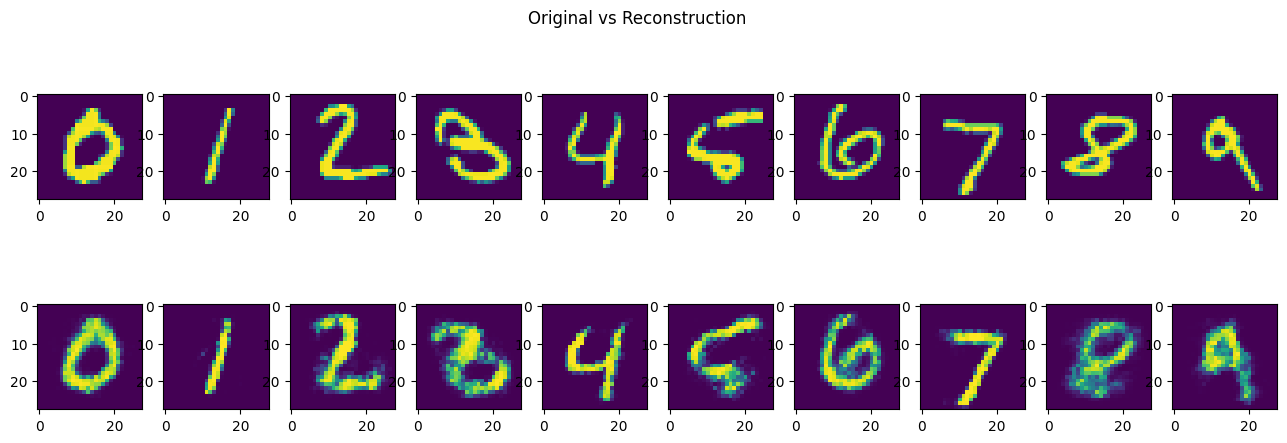

In [395]:
fig, axis = plt.subplots(2, 10, figsize=(16, 5))
fig.suptitle("Original vs Reconstruction")
j=0
for i in a:
    axis[0, j].imshow(data[i])
    axis[1, j].imshow(Reconstr[j])
    j=j+1

The reconstruction is reasonable, as we have trained the model only for 5 epochs on the whole training set. Also we have done it on binarized images, while here we fed the RBM with the original (rescaled in $[0,1]$) digits.

# 3) Classification

Let's use a very simple model: logistic regression classifier.

In [282]:
import struct

with open('datasets/train-images-idx3-ubyte/train-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))


In [283]:
data=data/255
data=data>0.5
X_train=np.zeros([60000,784])
for i in range(60000):
    X_train[i,:]=data[i,:,:].flatten()

In [284]:
X_train_encoded=np.zeros([60000,128])
for i in range(60000):
    X_train_encoded[i,:]=Restr_BM.encoding(X_train[i,:], sampling=False)

In [285]:
import struct

with open('datasets/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    data = data.reshape((size, nrows, ncols))

In [286]:
data=data/255
data=data>0.5
X_test=np.zeros([10000,784])
for i in range(10000):
    X_test[i,:]=data[i,:,:].flatten()

In [287]:
X_test_encoded=np.zeros([10000,128])
for i in range(10000):
    X_test_encoded[i,:]=Restr_BM.encoding(X_test[i,:], sampling=False)

In [288]:
with open('datasets/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_test = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    y_test = y_test.reshape((size,)) # (Optional)
print(y_test)

[7 2 1 ... 4 5 6]


So far we created the vectors for training and test, both encoded and not.

## First, we try on the original (flattened) dataset.

In [289]:
from my_model_selection import evaluate_model
from sklearn.linear_model import LogisticRegression

logreg_base = LogisticRegression()
logreg_base.fit(X_train, y_train)
results_logreg_base = evaluate_model(logreg_base, X_train, y_train, X_test, y_test)

c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set:  0.93115
confusion_matrix on training set: 
 [[5772    1   15   11   12   36   26    8   37    5]
 [   1 6579   33   17    5   24    4    9   58   12]
 [  30   63 5439   81   58   26   57   62  122   20]
 [  21   28  125 5536    6  188   17   50  108   52]
 [   9   21   30    6 5476   10   47   23   34  186]
 [  39   22   50  160   55 4825   80   14  131   45]
 [  30   13   35    3   36   69 5694    5   29    4]
 [  13   23   58   23   51   12    4 5897   14  170]
 [  36  107   67  131   26  147   42   15 5203   77]
 [  20   30   12   66  132   36    2  162   41 5448]]
Accuracy on validation set:  0.917
Confusion matrix: 
 [[ 955    0    0    2    0   10    5    6    2    0]
 [   0 1110    4    1    0    4    4    0   12    0]
 [   7    9  919   18   11    2   14    8   41    3]
 [   4    1   16  922    2   25    2   12   18    8]
 [   1    1    7    2  904    1   13    4   10   39]
 [  14    3    5   38   14  761   10    7   32    8]
 [   9    4    6    0    

In [290]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
y_pred=logreg_base.predict(X_test)
cm=confusion_matrix(y_test,y_pred)

<Axes: >

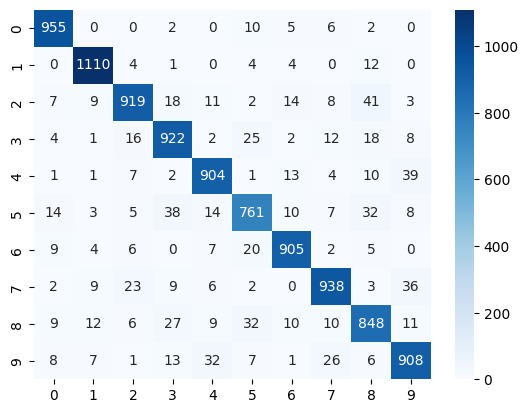

In [291]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

We obtained 0.917 of accuracy.

## Now, let's try on the encoded dataset.

In [292]:
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
results_logreg = evaluate_model(logreg, X_train_encoded, y_train, X_test_encoded, y_test)

Accuracy on training set:  0.93245
confusion_matrix on training set: 
 [[5725    0   25    8    7   20   31    1   99    7]
 [   0 6584   44   11   15    6   10    9   54    9]
 [  41   24 5544  105   50    8   15   46  108   17]
 [  16   11  118 5461    1  187    8   41  243   45]
 [   7   24   32    4 5313    9   26   38   66  323]
 [  44    5   14  151    4 4944   71    5  143   40]
 [  23   11   17    2   21   64 5740    0   40    0]
 [   6   22   60   26   44    8    0 5800   38  261]
 [  19   47   50  144   29  102   26    7 5380   47]
 [  19    7   17   67  135   29    4  140   75 5456]]
Accuracy on validation set:  0.9313
Confusion matrix: 
 [[ 958    0    5    1    0    2    4    2    8    0]
 [   0 1118    6    0    0    1    1    1    8    0]
 [  12    2  948   23    5    1    5    8   23    5]
 [   1    2   13  907    0   32    0    9   41    5]
 [   3    2    6    0  896    0    5    4   11   55]
 [   6    1    1   23    1  804   15    4   33    4]
 [   7    3    1    1   

c:\Users\Giamm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [293]:
y_pred=logreg.predict(X_test_encoded)
cm=confusion_matrix(y_test,y_pred)

<Axes: >

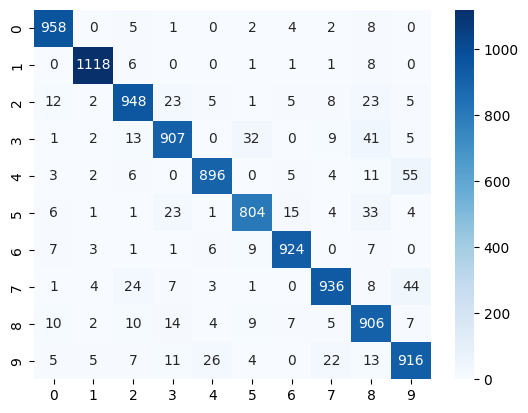

In [294]:
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

We scored 0.931 on the encoded dataset, not a great jump forward, but still an improvment. So, projecting in the (smaller) latent space was beneficial, as we "saved" space, time, computational power while increasing accuracy. 

# Conclusions

So far, we discovered  that the weights of the RBM clearly learn the shape of each digit class and that it was direcly interpretable in a graphical way by plotting them.


Furthermore, we have seen that a such a simple model can encode and decode the digits, reconstructing them fairly well.
We tested a classifier and proved how the embedding on the latent space of the hidden units can improve performance on logistic regression, but the improvment was not so outstanding.


In the end, the test we have done was not so representative, as the RBM was simple, along with the classifier used, much can be improved.
Now let's see the bunny part!

# Bonus: what if we reconstruct a bunny multiple times with an RBM?

In [396]:
import cv2
img = cv2.imread('./bunny.jpg',cv2.IMREAD_GRAYSCALE)
img.shape

(28, 28)

In [397]:
img=img/255

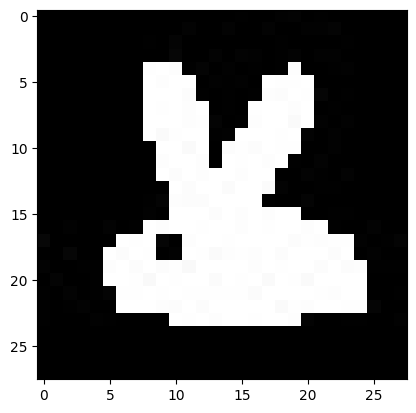

In [213]:
plt.imshow(img, cmap='gray')
plt.show()

In [399]:
img=img>0.5


In [400]:
img_flattened=img.flatten()

## We train only on the digit 2 to simplify the task

In [240]:
rbunnym=rbm(28**2,128)
training_history=rbunnym.fit(data=X_train[y_train==2], lr=0.1, epochs=10)

error= 0.09574590158319117 at epoch= 0 

error= 0.07981722396914455 at epoch= 1 

error= 0.07589435572819259 at epoch= 2 

error= 0.07407186187667414 at epoch= 3 

error= 0.0729669763172137 at epoch= 4 

error= 0.07203678299114208 at epoch= 5 

error= 0.07161931993341143 at epoch= 6 

error= 0.07059385939672948 at epoch= 7 

error= 0.07019052585787587 at epoch= 8 

error= 0.07029949442012455 at epoch= 9 



In [403]:
a=img_flattened.copy()
b=np.zeros([64,28,28])
b[0,:,:]=img
for i in range(63):
    rbunnym.encoding(a, sampling=True)
    a=rbunnym.reconstruction(sampling=True)
    b[i+1,:,:]=a.reshape(28,28)

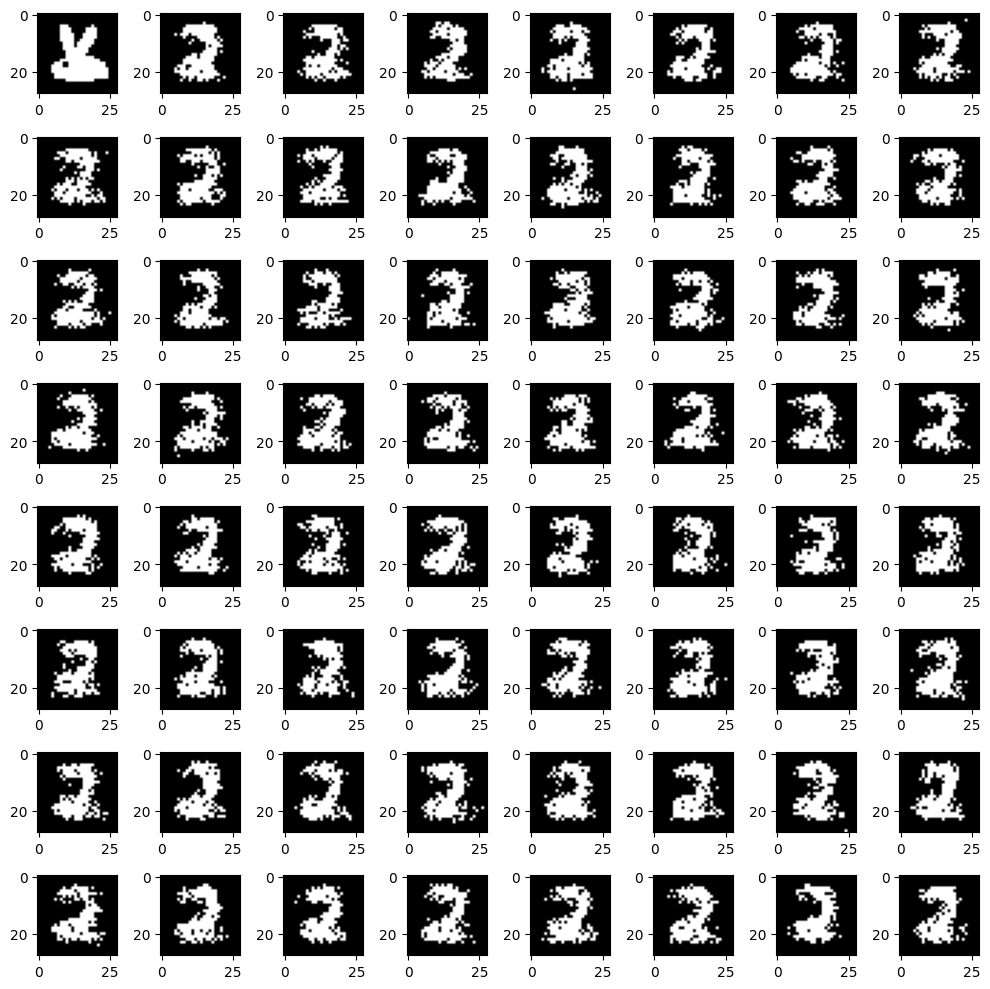

In [404]:
fig, axes = plt.subplots(8,8, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    # reshaping the weights vector for each unit to the original 28x28 image shape
    ax.imshow(b[i,:,:], cmap='gray')

fig.tight_layout()

Indeed, in the reconstruction, the white pixels always tend to accumulate in the shape of a (noisy) 2.

Let's remove the noise by not sampling (i.e binarizing) on the reconstruction, but by taking the distribution of "v given h".

In [409]:
a=img_flattened.copy()
b=np.zeros([64,28,28])
b[0,:,:]=img
for i in range(63):
    rbunnym.encoding(a, sampling=True)
    a=rbunnym.reconstruction(sampling=False)
    b[i+1,:,:]=a.reshape(28,28)

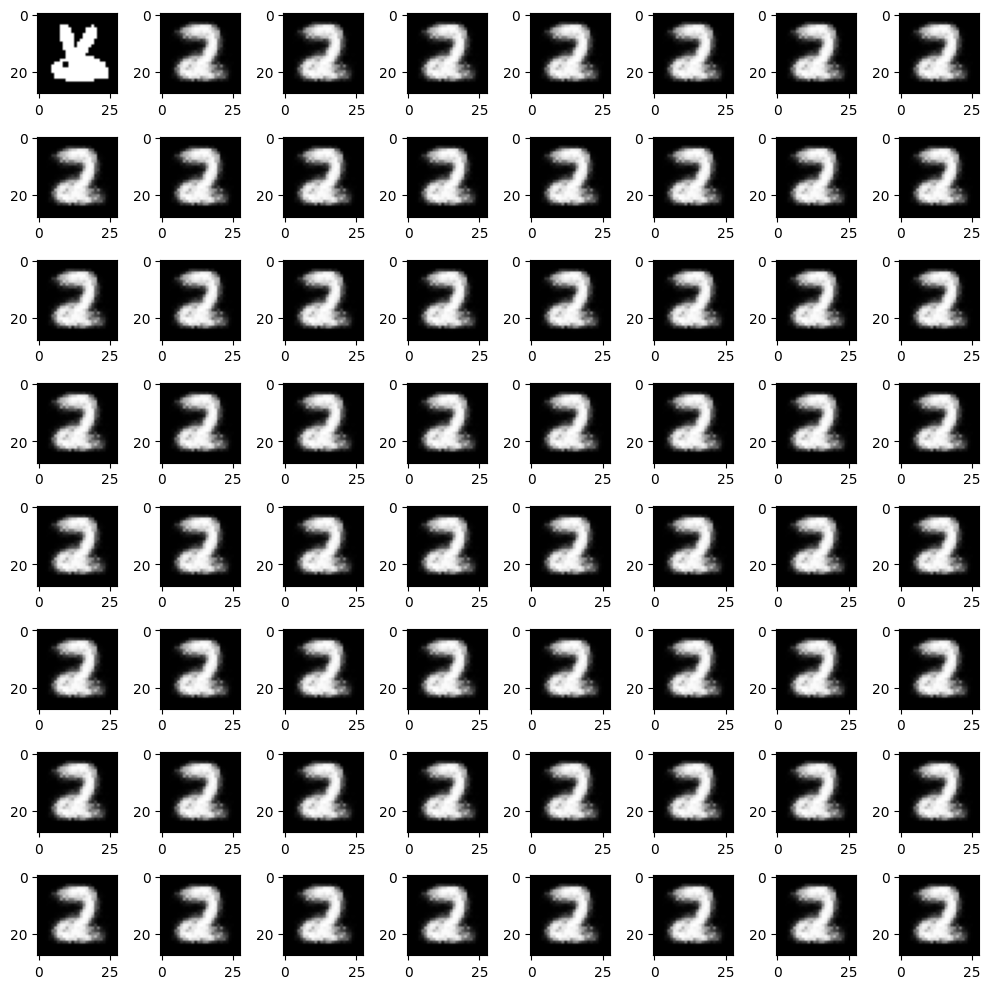

In [410]:
fig, axes = plt.subplots(8,8, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    # reshaping the weights vector for each unit to the original 28x28 image shape
    ax.imshow(b[i,:,:], cmap='gray')

fig.tight_layout()

Indeed, just a 2.

## And what about the first RBM, trained on the whole MNIST?

In [405]:
a=img_flattened.copy()
b=np.zeros([64,28,28])
b[0,:,:]=img
for i in range(63):
    Restr_BM.encoding(a, sampling=True)
    a=Restr_BM.reconstruction(sampling=False)
    b[i+1,:,:]=a.reshape(28,28)

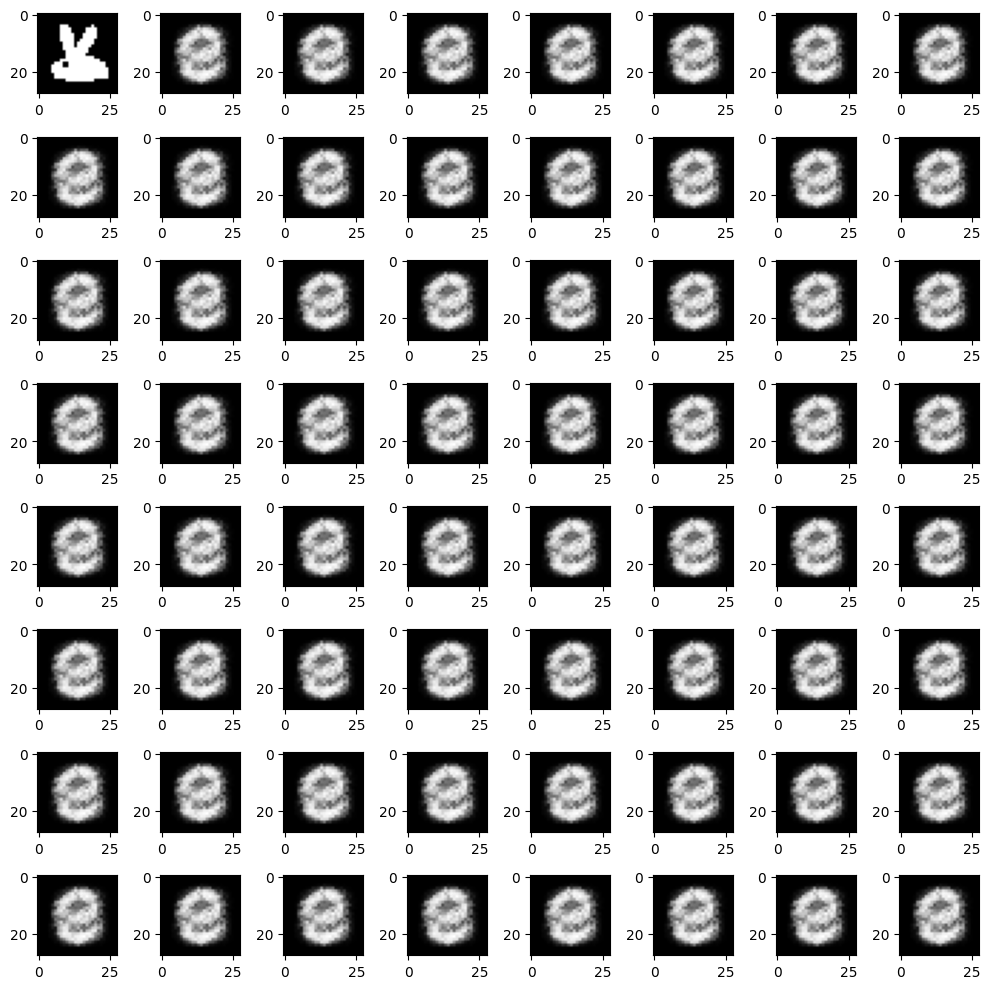

In [406]:
fig, axes = plt.subplots(8,8, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    # reshaping the weights vector for each unit to the original 28x28 image shape
    ax.imshow(b[i,:,:], cmap='gray')

fig.tight_layout()

It looks like something globular, maybe it can't decide if it's a 0 or an 8?

This is probably what we get, whatever we give to the RBM.